In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('C:/Users/Administrator/Desktop/Data Science/Customer Churn.csv')

In [7]:
print("Dimension", df.shape)
print("Structure", df.info())
print("Summary", df.describe())

Dimension (3150, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: 

In [21]:
print("Missing value\n", df.isna().sum())
df_filled = df.fillna(df.mean())

Missing value
 Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64


array([[<Axes: title={'center': 'Status'}>]], dtype=object)

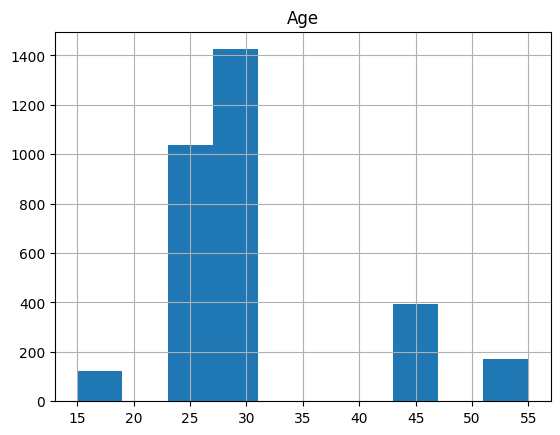

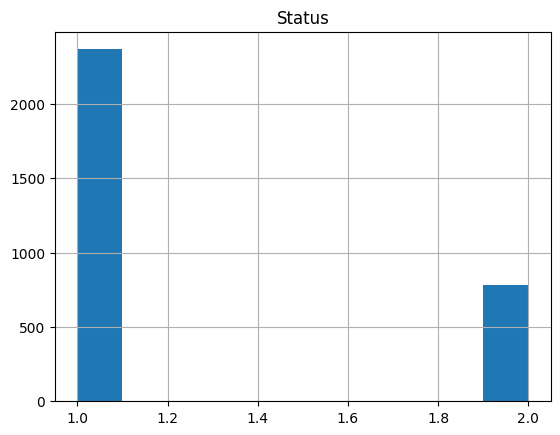

In [19]:
# Select two continuous variables to plot histograms
df.hist(column='Age')

df.hist(column='Status')

<Axes: xlabel='Age'>

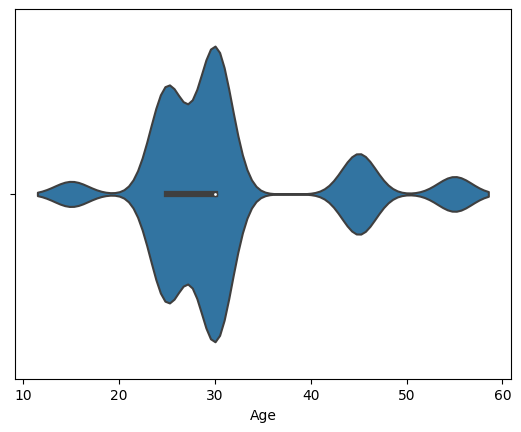

In [24]:
sns.violinplot(data=df_filled, x='Age')

<Axes: >

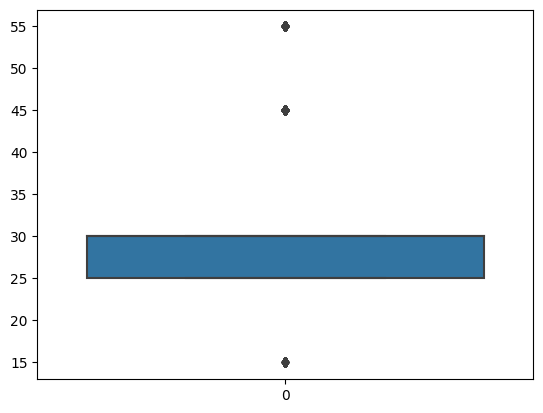

In [35]:
# Before outlier treatment
sns.boxplot(df['Age'])

<Axes: >

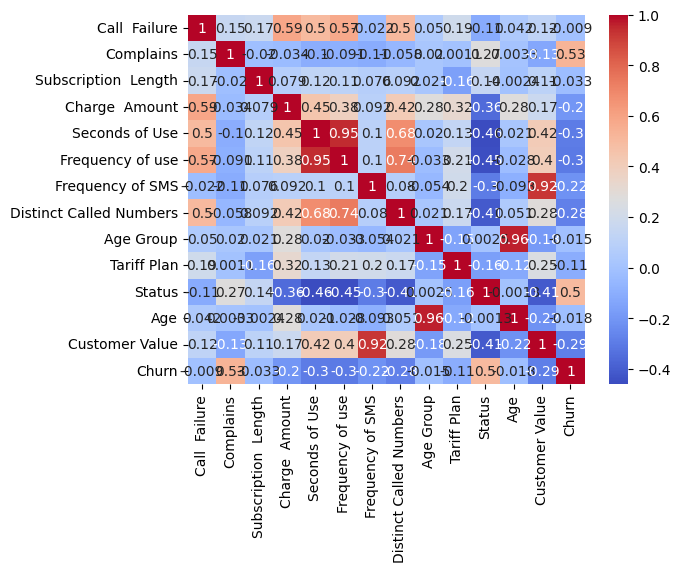

In [37]:
corr=df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
num = ['Complains','Age Group','Status','Age','Churn']
scaler = StandardScaler()
df[num] = scaler.fit_transform()